## Phân tích thú vị

#### Đọc file data_ready.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('C:/Users/Admin/aim/project_analysis_data_facebook/data/data_ready.csv')

In [4]:
df = df.reset_index(inplace = False)
df["index"] = df["index"] + 1

In [5]:
df.head()

,index,post_id,post_text,comments,comments_full,shares,reaction_count,thích,yêu thích,thương thương,haha,wow,buồn,phẫn nộ,hour,date,day
0,1,8.992690e+14,🔴🗣️ Emile Heskey is the latest to tell the tal...,16,"[{'comment_id': '1186163892166613', 'comment_u...",101,1175,982,183,10,0.0,0.0,0.0,0.0,0,11/21/2023,Tuesday
1,2,8.992110e+14,Back-to-back PFA Premier League Fans’ Player o...,83,"[{'comment_id': '277210241476921', 'comment_ur...",31,4594,3638,902,49,1.0,4.0,0.0,0.0,22,11/20/2023,Monday
2,3,8.990810e+14,Ryan's first goal in Red 😍\n\nA look back at o...,49,"[{'comment_id': '388506910181825', 'comment_ur...",53,5157,4072,1022,55,3.0,4.0,1.0,0.0,21,11/20/2023,Monday
3,4,8.991520e+14,"Well in, Robbo 👏 #Euro2024 🔜\n\nVâng, Robbo 👏 ...",150,"[{'comment_id': '314996431472511', 'comment_ur...",61,16019,12735,3112,146,19.0,6.0,1.0,0.0,20,11/20/2023,Monday
4,5,8.991290e+14,Two years ago today... Diogo 😲\n\nNgày này hai...,211,"[{'comment_id': '1028198778438522', 'comment_u...",211,14403,11699,2506,125,45.0,26.0,1.0,1.0,19,11/20/2023,Monday


#### Phân tích sự kiên

In [6]:
df.iloc[8].post_text

'A scintillating 4-0 win over Arsenal on this day in 2021 🤩'

In [7]:
df.iloc[25].post_text

'Harvey extending the England U21s lead this evening against Serbia 🙌\n\nHarvey kéo dài đội U21 Anh dẫn trước tối nay với Serbia 🙌'

In [8]:
df.iloc[42].post_text

"Diogo provided an assist for Portugal's opener in their 2-0 win over Liechtenstein 🙌🇵🇹\n\n📸 Seleções de Portugal\n\nDiogo đã cung cấp một kiến tạo cho trận mở màn của Bồ Đào Nha trong chiến thắng 2-0 trước Liechtenstein 🙌🇵🇹\n\n📸 Seleções de Portugal"

In [9]:
df.iloc[56].post_text

'A group of local school children were given a day to remember at the AXA Training Centre recently when they were surprised by their heroes during a Nike #GAMEON event hosted by the LFC Foundation 💫'

In [10]:
df.iloc[64].post_text

'Looking back at our first win of the season 🆚 Bournemouth 📽️\n\nLucho, Salah, and Diogo on target 🎯\n\nNhìn lại chiến thắng đầu tiên của chúng tôi trong mùa giải 🆚 Bournemouth 📽️\n\nLucho, Salah, và Diogo vào mục tiêu 🎯'

In [11]:
top_event = df.iloc[[8,25,42,56,64]]

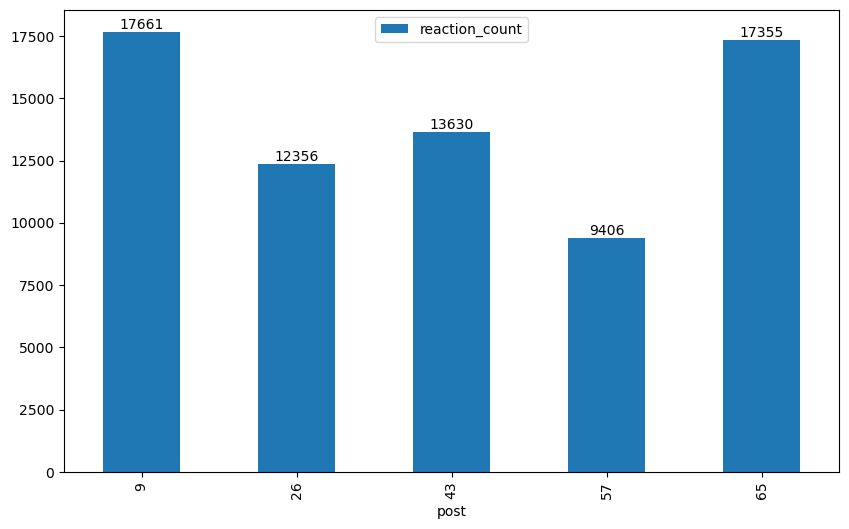

In [12]:
top_event_plt = top_event.plot(kind = "bar", x = "index", y = "reaction_count", xlabel = "post", figsize=(10,6))

for b in top_event_plt.patches:
    top_event_plt.annotate(str(b.get_height()), (b.get_x() + b.get_width() / 2., b.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

#### Dự đoán số chia sẻ dựa trên mô hình học máy 

##### Khai báo thư viện

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

##### Load dữ liệu từ file CSV hoặc nguồn dữ liệu khác

In [14]:
data = pd.read_csv('C:/Users/Admin/aim/project_analysis_data_facebook/data/data_ready.csv')

##### Chọn các đặc trưng và mục tiêu

In [15]:
features = ['comments', 'thích', 'haha', 'yêu thích', 'wow', 'buồn', 'phẫn nộ', 'thương thương']
target = 'shares'

X = data[features]
y = data[target]

##### Chia dữ liệu thành tập huấn luyện và tập kiểm tra

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Khởi tạo mô hình Gradient Boosting Regressor

In [17]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

##### Huấn luyện trên tập huấn luyện

In [18]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

##### Dự đoán trên tập kiểm tra

In [19]:
y_pred = model.predict(X_test)


##### Đánh giá hiệu xuất của mô hình

In [20]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 407592.8321141412


##### Trực quan hóa dự đoán và kết quả thực tế 

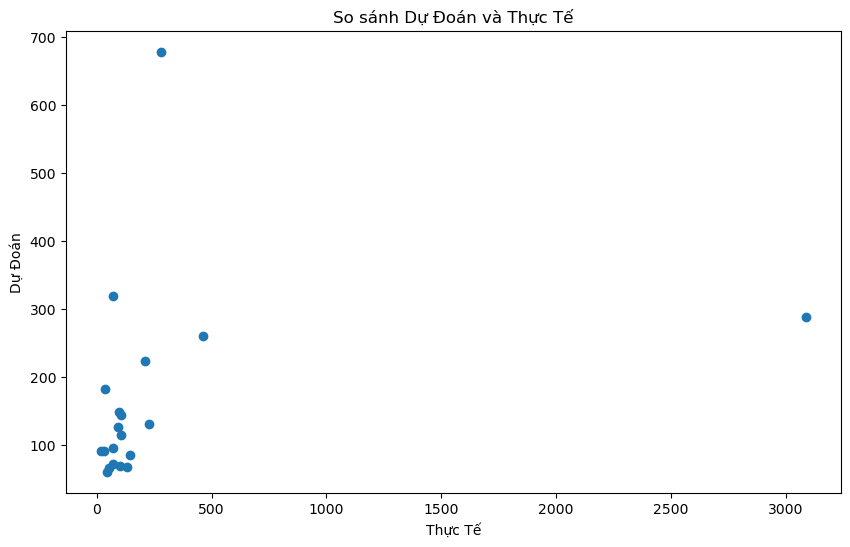

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Thực Tế')
plt.ylabel('Dự Đoán')
plt.title('So sánh Dự Đoán và Thực Tế')
plt.show()